# Filter dataset

In [1]:
import codecs
from collections import Counter
import re

import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm

In [2]:
nlp = spacy.load('en_core_web_md')

In [3]:
nlp_simple = spacy.load('en_core_web_md', diable=['tagger', 'parser', 'ner', 'textcat'])
#nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [188]:
docs_index = pd.read_csv('../../data/documents.csv')
questions = pd.read_csv('../../data/qaps.csv')

In [5]:
docs_index = docs_index.loc[lambda df: df['kind'] == 'gutenberg']
questions = questions.loc[lambda df: df['question'].str.startswith('Who')]
questions = questions.merge(docs_index.loc[:, ['document_id']], how='inner', on='document_id')

In [44]:
docs_index.head()

,document_id,set,kind,story_url,story_file_size,wiki_url,wiki_title,story_word_count,story_start,story_end
0,0029bdbe75423337b551e42bb31f9a102785376f,train,gutenberg,http://www.gutenberg.org/ebooks/21572.txt.utf-8,814507,http://en.wikipedia.org/wiki/Percival_Keene,Percival Keene,173334,Produced by Nick,new eBooks .
1,00936497f5884881f1df23f4834f6739552cee8b,train,gutenberg,http://www.gutenberg.org/ebooks/3526.txt.utf-8,566874,http://en.wikipedia.org/wiki/Five_Weeks_in_a_B...,Five Weeks in a Balloon,112898,Produced by Judy,new eBooks .
2,00950a3641e6a28b04a6fabf6334140e2deaa9fd,train,gutenberg,http://www.gutenberg.org/ebooks/42188.txt.utf-8,90192,http://en.wikipedia.org/wiki/Shadows_in_the_Mo...,Shadows in the Moonlight (story),17670,Produced by Greg,new eBooks .
3,00fb61fa7bee266ad995e52190ebb73606b60b70,valid,gutenberg,http://www.gutenberg.org/ebooks/3771.txt.utf-8,372868,http://en.wikipedia.org/wiki/Cynthia's_Revels,Cynthia's Revels,74928,Produced by Sue,new eBooks .
4,014de1a8802c05ff64efa047e9290fb7fccea2b4,test,gutenberg,http://www.gutenberg.org/ebooks/1329.txt.utf-8,560685,http://en.wikipedia.org/wiki/A_Voyage_to_Arcturus,A Voyage to Arcturus,113790,Produced by An,new eBooks .


In [11]:
questions.head()

,document_id,set,question,answer1,answer2,question_tokenized,answer1_tokenized,answer2_tokenized
0,0029bdbe75423337b551e42bb31f9a102785376f,train,Who is Miss Delmer?,the elderly spinster aunt of the Earl de Verse...,She's Captail Delmar's aunt.,Who is Miss Delmer ?,the elderly spinster aunt of the Earl de Verse...,She s Captail Delmar s aunt .
1,0029bdbe75423337b551e42bb31f9a102785376f,train,Who does Arabella Mason wed?,"Ben Keene, Delmar's valet",Ben Keene,Who does Arabella Mason wed ?,"Ben Keene , Delmar s valet",Ben Keene
2,0029bdbe75423337b551e42bb31f9a102785376f,train,Who is the bully that steals Percival's lunch?,"his teacher, Mr. O'Gallagher",The schoolmaster,Who is the bully that steals Percival s lunch ?,"his teacher , Mr. O'Gallagher",The schoolmaster
3,0029bdbe75423337b551e42bb31f9a102785376f,train,Who does Percival convince the Pirates to spare?,a rich Dutch merchant and his daughter Minnie,A Dutch Merchant and his daughter,Who does Percival convince the Pirates to spare ?,a rich Dutch merchant and his daughter Minnie,A Dutch Merchant and his daughter
4,0029bdbe75423337b551e42bb31f9a102785376f,train,Who lives at Madeline Hall?,Miss Delmar,Miss Delmar,Who lives at Madeline Hall ?,Miss Delmar,Miss Delmar


In [9]:
docs_index.to_csv('../../data/documents_books.csv', index=False)
questions.to_csv('../../data/questions_books_who.csv', index=False)

In [4]:
docs_index = pd.read_csv('../../data/documents_books.csv')
questions = pd.read_csv('../../data/questions_books_who.csv')

In [5]:
summaries = pd.read_csv('../../data/third_party/wikipedia/summaries.csv')

In [6]:
summaries.head()

,document_id,set,summary,summary_tokenized
0,0025577043f5090cd603c6aea60f26e236195594,test,"Mark Hunter (Slater), a high school student i...","Mark Hunter ( Slater ) , a high school student..."
1,0029bdbe75423337b551e42bb31f9a102785376f,train,"At Madeline Hall, an old mansion-house near S...","At Madeline Hall , an old mansion-house near S..."
2,00936497f5884881f1df23f4834f6739552cee8b,train,"A scholar and explorer, Dr. Samuel Ferguson, ...","A scholar and explorer , Dr. Samuel Ferguson ,..."
3,00950a3641e6a28b04a6fabf6334140e2deaa9fd,train,The story begins when a female lovely named O...,The story begins when a female lovely named Ol...
4,00ee9e01a0e581e0d8cbf7e865a895147c480c5e,train,Chev Chelios (Jason Statham) is a Los Angeles...,Chev Chelios ( Jason Statham ) is a Los Angele...


In [7]:
questions = questions.merge(summaries.loc[:, ['document_id', 'summary',  'summary_tokenized']], how='left', on='document_id')

In [8]:
questions.head()

,document_id,set,question,answer1,answer2,question_tokenized,answer1_tokenized,answer2_tokenized,summary,summary_tokenized
0,0029bdbe75423337b551e42bb31f9a102785376f,train,Who is Miss Delmer?,the elderly spinster aunt of the Earl de Verse...,She's Captail Delmar's aunt.,Who is Miss Delmer ?,the elderly spinster aunt of the Earl de Verse...,She s Captail Delmar s aunt .,"At Madeline Hall, an old mansion-house near S...","At Madeline Hall , an old mansion-house near S..."
1,0029bdbe75423337b551e42bb31f9a102785376f,train,Who does Arabella Mason wed?,"Ben Keene, Delmar's valet",Ben Keene,Who does Arabella Mason wed ?,"Ben Keene , Delmar s valet",Ben Keene,"At Madeline Hall, an old mansion-house near S...","At Madeline Hall , an old mansion-house near S..."
2,0029bdbe75423337b551e42bb31f9a102785376f,train,Who is the bully that steals Percival's lunch?,"his teacher, Mr. O'Gallagher",The schoolmaster,Who is the bully that steals Percival s lunch ?,"his teacher , Mr. O'Gallagher",The schoolmaster,"At Madeline Hall, an old mansion-house near S...","At Madeline Hall , an old mansion-house near S..."
3,0029bdbe75423337b551e42bb31f9a102785376f,train,Who does Percival convince the Pirates to spare?,a rich Dutch merchant and his daughter Minnie,A Dutch Merchant and his daughter,Who does Percival convince the Pirates to spare ?,a rich Dutch merchant and his daughter Minnie,A Dutch Merchant and his daughter,"At Madeline Hall, an old mansion-house near S...","At Madeline Hall , an old mansion-house near S..."
4,0029bdbe75423337b551e42bb31f9a102785376f,train,Who lives at Madeline Hall?,Miss Delmar,Miss Delmar,Who lives at Madeline Hall ?,Miss Delmar,Miss Delmar,"At Madeline Hall, an old mansion-house near S...","At Madeline Hall , an old mansion-house near S..."


# Vector entity similarity

## Full docs - 3 sentences

In [4]:
# Processing a doc with spacy takes the most time so we batch quesitons for the same doc together
grouped = questions.groupby('document_id')
len_grouped = len(grouped)
for doc_id, group in tqdm(grouped, total=len_grouped):
    data_set = group['set'].tolist()[0]
    q_list = [nlp_simple(q) for q in group['question'].tolist()]
    q_list_tokenized = []
    for q in q_list:
        tokenized = ' '.join([token.text for token in q])
        tokenized = re.sub('[\s]+', ' ', tokenized)
        q_list_tokenized.append(tokenized)
        
    best_similarity_score = [0.0] * len(q_list)
    best_sent_triple = [''] * len(q_list)
    
    # Process new doc
    with codecs.open('../../data/clean/'+ doc_id +'-clean.content', 'r', 
                     encoding='utf-8', errors='ignore') as f:
        text = f.read()
            
    # Process doc in chunks of 500,000 characters
    chunk_size = 500000
    for start, end in zip(range(0, len(text), chunk_size), range(chunk_size, len(text)+chunk_size, chunk_size)):
        doc = nlp_simple(text[start:end])

        sent_stack = []
        for sent in doc.sents:
            # create groups of 3 sentences
            if len(sent_stack) < 3:
                sent_stack.append(sent)
            else:
                sent_stack.pop(0)
                sent_stack.append(sent)
                sent_triple = doc[sent_stack[0].start:sent_stack[-1].end]
                
                for i,q in enumerate(q_list):
                    similarity_score = sent_triple.similarity(q)
                    if similarity_score > best_similarity_score[i]:
                        best_similarity_score[i] = similarity_score
                        best_sent_triple[i] = ' '.join([token.text for token in sent_triple])
    
    #with open('../../data/most_similar_sentence_triples_{}.txt'.format(data_set), 'a') as f:
    with codecs.open('../../data/most_similar_sentence_triples_{}.txt'.format(data_set), 'a', 
                     encoding='utf-8', errors='ignore') as f:
        for best, q in zip(best_sent_triple, q_list_tokenized):
            best = re.sub('[\s]+', ' ', best)
            f.write(best + ' <d> ' + q + '\n')

100%|██████████████████████████████████████| 767/767 [5:06:29<00:00, 23.98s/it]


write tokenized answers

In [5]:
for i, row in questions.iterrows():
    a = nlp_simple(row['answer1'])
    a = ' '.join([token.text for token in a])
    a = re.sub('[\s]+', ' ', a)
    
    with codecs.open('../../data/answers_{}.txt'.format(row['set']), 'a', 
                     encoding='utf-8', errors='ignore') as f:
        f.write(a + '\n')

generate vocab

In [60]:
from preshed.counter import PreshCounter
from spacy.attrs import ORTH

counts_train = PreshCounter()
counts_valid = PreshCounter()
counts_test = PreshCounter()
nlp_en = spacy.blank('en')

for i, row in tqdm(docs_index.iterrows(), total=len(docs_index)):
    with codecs.open('../../data/clean/'+ row['document_id'] +'-clean.content', 'r', 
                     encoding='utf-8', errors='ignore') as f:
        text = f.read()
        
    doc = nlp_en.tokenizer(text)
    
    if row['set'] == 'train':
        for word in doc:
            counts_train.inc(word.orth, 1)
    elif row['set'] == 'valid':
        for word in doc:
            counts_valid.inc(word.orth, 1)
    elif row['set'] == 'test':
        for word in doc:
            counts_test.inc(word.orth, 1)
    
    #for word_id, count in counts:
    #    print(count, nlp.vocab.strings[word_id])
    
for i, row in questions.iterrows():
    doc = nlp_en.tokenizer(row['question'])
    
    if row['set'] == 'train':
        for word in doc:
            counts_train.inc(word.orth, 1)
    elif row['set'] == 'valid':
        for word in doc:
            counts_valid.inc(word.orth, 1)
    elif row['set'] == 'test':
        for word in doc:
            counts_test.inc(word.orth, 1)
            
    doc = nlp_en.tokenizer(row['answer1'])
    
    if row['set'] == 'train':
        for word in doc:
            counts_train.inc(word.orth, 1)
    elif row['set'] == 'valid':
        for word in doc:
            counts_valid.inc(word.orth, 1)
    elif row['set'] == 'test':
        for word in doc:
            counts_test.inc(word.orth, 1)

100%|████████████████████████████████████████| 783/783 [54:45<00:00,  4.20s/it]


In [66]:
import pickle
with open('../../data/counts_valid.pkl', 'wb') as f:
    pickle.dump(counts_valid, f)

write vocab

In [50]:
temp = [(word_id, count) for word_id, count in counts_test]
temp.sort(key=lambda x: x[1], reverse=True)

with codecs.open('../../data/vocab_test.q', 'a', 
                 encoding='utf-8', errors='ignore') as f:
    for word_id, count in temp:
        temp_word = nlp_en.vocab.strings[word_id].strip()
        if len(temp_word) != 0:
            f.write('{}\n'.format(temp_word))

## Summary - 3 sentences

In [13]:
# Processing a doc with spacy takes the most time so we batch quesitons for the same doc together
for i, row in tqdm(questions.iterrows(), total=len(questions)):
    q = nlp_simple(row['question'])
    q_tokenized = ' '.join([token.text for token in q])
    q_tokenized = re.sub('[\s]+', ' ', q_tokenized)
    
    best_similarity_score = 0.0
    best_sent_triple = ''
    doc = nlp_simple(row['summary'])

    sent_stack = []
    for sent in doc.sents:
        # create groups of 3 sentences
        if len(sent_stack) < 3:
            sent_stack.append(sent)
        else:
            sent_stack.pop(0)
            sent_stack.append(sent)
            sent_triple = doc[sent_stack[0].start:sent_stack[-1].end]

            similarity_score = sent_triple.similarity(q)
            if similarity_score > best_similarity_score:
                best_similarity_score = similarity_score
                best_sent_triple = ' '.join([token.text for token in sent_triple])
    
    with codecs.open('../../data/summary_most_similar_sentence_triples_{}.txt'.format(row['set']), 'a', 
                     encoding='utf-8', errors='ignore') as f:
        best = re.sub('[\s]+', ' ', best_sent_triple)
        f.write(best + ' <d> ' + q_tokenized + '\n')

100%|██████████████████████████████████████| 5707/5707 [16:13<00:00,  5.87it/s]


In [31]:
from preshed.counter import PreshCounter
from spacy.attrs import ORTH

counts_train = PreshCounter()
counts_valid = PreshCounter()
counts_test = PreshCounter()
nlp_en = spacy.blank('en')

for i, row in tqdm(questions.iterrows(), total=len(questions)):
    doc = nlp_en.tokenizer(row['summary_tokenized'])
    
    if row['set'] == 'train':
        for word in doc:
            counts_train.inc(word.orth, 1)
    elif row['set'] == 'valid':
        for word in doc:
            counts_valid.inc(word.orth, 1)
    elif row['set'] == 'test':
        for word in doc:
            counts_test.inc(word.orth, 1)
            
    doc = nlp_en.tokenizer(row['question_tokenized'])
    
    if row['set'] == 'train':
        for word in doc:
            counts_train.inc(word.orth, 1)
    elif row['set'] == 'valid':
        for word in doc:
            counts_valid.inc(word.orth, 1)
    elif row['set'] == 'test':
        for word in doc:
            counts_test.inc(word.orth, 1)

100%|██████████████████████████████████████| 5707/5707 [02:02<00:00, 46.70it/s]


In [34]:
temp = [(word_id, count) for word_id, count in counts_valid]
temp.sort(key=lambda x: x[1], reverse=True)

with codecs.open('../../data/vocab_summary_valid.q', 'a', 
                 encoding='utf-8', errors='ignore') as f:
    for word_id, count in temp:
        temp_word = nlp_en.vocab.strings[word_id].strip()
        if len(temp_word) != 0:
            f.write('{}\n'.format(temp_word))

In [22]:
# write summaries
with codecs.open('../../data/summaries_test.q', 'a', encoding='utf-8', errors='ignore') as f:
    for i,row in questions.iterrows():
        if row['set'] == 'test':
            f.write(row['summary_tokenized'] + ' <d> ' + row['question_tokenized'] + '\n')

In [14]:
token_lens = []
with codecs.open('../../data/summary_most_similar_sentence_triples_train.txt', 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        token_lens.append(len(f.readline().split()))

D:\ProgramData\Anaconda3\envs\narrativeqa\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


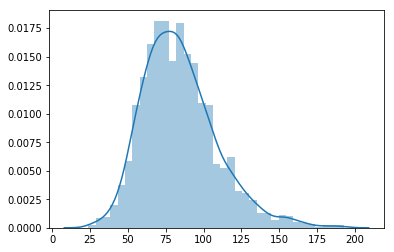

In [17]:
import seaborn as sns
sns.distplot(token_lens)

In [22]:
import nltk
import itertools

In [24]:
with codecs.open('../../data/third_party/most_similar_sentence_triples_train.q', 'r', encoding='utf-8', errors='ignore') as f:
    qlines = f.readlines()
    
with codecs.open('../../data/third_party/summaries_train.a', 'r', encoding='utf-8', errors='ignore') as f:
    alines = f.readlines()

qtokenized = [ line.split(' ') for line in qlines ]
atokenized = [ line.split(' ') for line in alines ]

def index_(tokenized_sentences, vocab_size):
    # get frequency distribution

    freq_dist = nltk.FreqDist(itertools.chain(*tokenized_sentences))
    # get vocabulary of 'vocab_size' most used words

    vocab = freq_dist.most_common(vocab_size)
    # index2word

    index2word = ['_'] + ['<unk>'] + [ x[0] for x in vocab ]
    # word2index

    word2index = dict([(w,i) for i,w in enumerate(index2word)] )
    return index2word, word2index, freq_dist

idx2w, w2idx, freq_dist = index_( qtokenized + atokenized, vocab_size=1000000)

In [66]:
with codecs.open('../../data/third_party/most_similar_sentence_triples_valid.q', 'r', encoding='utf-8', errors='ignore') as f:
    qlines = f.readlines()
    
with codecs.open('../../data/third_party/summaries_valid.a', 'r', encoding='utf-8', errors='ignore') as f:
    alines = f.readlines()

    
qtokenized = [ line.split(' ') for line in qlines ]
atokenized = [ line.split(' ') for line in alines ]

In [67]:
count = 0
count_unk = 0
words = []
words_unk = []

for line in qtokenized:
    for token in line:
        if token in w2idx:
            count += 1
            words.append(token)
        else:
            count_unk += 1
            words_unk.append(token)
        
print(count, count_unk)
print(len(set(words)), len(set(words_unk)))

21843 1699
3001 1196


In [68]:
count = 0
count_unk = 0
words = []
words_unk = []

for line in atokenized:
    for token in line:
        if token in w2idx:
            count += 1
            words.append(token)
        else:
            count_unk += 1
            words_unk.append(token)
        
print(count, count_unk)
print(len(set(words)), len(set(words_unk)))

838 352
336 280


In [38]:
len(freq_dist.items())

20785

In [50]:
freq_dist.most_common(10)

[('the', 11007),
 (',', 8771),
 ('.', 6640),
 ('to', 6058),
 ('of', 5641),
 ('and', 4479),
 ('Who', 4284),
 ('?\n', 4021),
 ('<d>', 4016),
 ('a', 3821)]

In [51]:
print(np.sum([v <= 1 for v in freq_dist.values()]))
np.sum([v for v in freq_dist.values()])

10163


246286

D:\ProgramData\Anaconda3\envs\narrativeqa\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


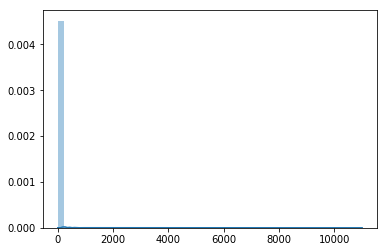

In [36]:
sns.distplot([v for v in freq_dist.values()])

## Ents

In [4]:
def clean_ent_ws(ent):
    return re.sub('[\s]+', ' ', ent.text.strip())

def get_people_ents_and_mentions(doc):
    people_ents = []
    for ent in doc.ents:
        # Get person entities
        if ent.label_ is 'PERSON':
            people_ents.append(ent)
            
    ent_mentions = Counter([clean_ent_ws(ent) for ent in people_ents])
    #ent_mentions = [k for k,v in ent_mentions.items() if v >= 5 and len(k) > 2]
    return people_ents, ent_mentions

def get_ent_most_similar(people_ents, question):
    ent_similarity = {}
    
    for ent in people_ents:
        similarity = ent.sent.similarity(question)

        ent_str = clean_ent_ws(ent)
        if (ent_str not in ent_similarity or 
                ent_similarity[ent_str]['similarity'] < similarity):
            ent_similarity[ent_str] = {
                'question': question.text,
                'similarity': similarity,
                'sentence': ent.sent.text,
                'sent_start_char': ent.sent.start_char,
                'sent_end_char': ent.sent.end_char
            }
            
    return ent_similarity

In [5]:
previous_doc_id = ''
output_csv = ''
output_df = pd.DataFrame()

for i, row in tqdm(questions.iterrows(), total=len(questions)):
    if row['document_id'] != previous_doc_id:
        # process new doc
        with codecs.open('../../data/clean/'+ row['document_id'] +'-clean.content', 'r', 
                         encoding='utf-8', errors='ignore') as f:
            text = f.read()
            
        # Process doc in chunks of 500,000 characters
        chunk_size = 500000
        people_ents_total = []
        ent_mentions_total = {}
        chunk_num = 0
        for start, end in zip(range(0, len(text), chunk_size), range(chunk_size, len(text)+chunk_size, chunk_size)):
            doc = nlp(text[start:end])

            # processing on doc chunk
            people_ents, ent_mentions = get_people_ents_and_mentions(doc)

            # combine people_ents and ent_mentions from other chunks
            people_ents_total.extend(people_ents)
            for k,v in ent_mentions.items():
                if k not in ent_mentions_total:
                    ent_mentions_total.update({k: v})
                else:
                    ent_mentions_total[k] = ent_mentions_total[k] + v

        # Final data structures
        ent_mentions_total = [k for k,v in ent_mentions_total.items() if v >= 5 and len(k) > 2]
        people_ents_total = [ent for ent in people_ents_total if clean_ent_ws(ent) in ent_mentions_total]
        
        csv_output_id = previous_doc_id
        previous_doc_id = row['document_id']
        
    else:
        # use already processed doc
        pass
    
    # Question-sentence similarity
    question = nlp(row['question'])
    ent_similarity = get_ent_most_similar(people_ents_total, question)
    
    if csv_output_id != '' and len(output_df) != 0:
        # If we reach the end of a set of doc questions then output csv
        output_df.to_csv('../../data/ent_candidates/'+ csv_output_id +'-candidates.csv', index=False)
        output_df = pd.DataFrame()
        csv_output_id = ''
    elif i == len(questions) - 1:
        # Output csv of the last iteration
        df = pd.DataFrame.from_dict(ent_similarity, orient='index')
        df.reset_index(level=0, inplace=True)
        df.rename(columns={'index':'entity'}, inplace=True)
        df['document_id'] = row['document_id']
        output_df = pd.concat([output_df, df])
    
        output_df.to_csv('../../data/ent_candidates/'+ row['document_id'] +'-candidates.csv', index=False)
        output_df = pd.DataFrame()
        csv_output_id = ''
        
    # Append question record to datafram for this document
    df = pd.DataFrame.from_dict(ent_similarity, orient='index')
    df.reset_index(level=0, inplace=True)
    df.rename(columns={'index':'entity'}, inplace=True)
    df['document_id'] = row['document_id']
    output_df = pd.concat([output_df, df])

100%|████████████████████████████████████| 5707/5707 [5:04:49<00:00,  3.20s/it]


# Answer estimation

In [108]:
questions.loc[2000:2010]

,document_id,set,question,answer1,answer2,question_tokenized,answer1_tokenized,answer2_tokenized
2000,5adcaefee3be670642adf44400e9da6f0235eff7,train,Who is the love of George Stransom's life?,Mary Antrim.,Mary Antrim,Who is the love of George Stransom s life ?,Mary Antrim .,Mary Antrim
2001,5adcaefee3be670642adf44400e9da6f0235eff7,train,Who is the one person that Stransom refuses to light a candle for?,Acton Hague.,Acton Hague,Who is the one person that Stransom refuses to light a candle for ?,Acton Hague .,Acton Hague
2002,5adcaefee3be670642adf44400e9da6f0235eff7,train,Who is Mary Antrim asking Stransom to forgive?,Hague.,Acton Hague,Who is Mary Antrim asking Stransom to forgive ?,Hague .,Acton Hague
2003,5adcaefee3be670642adf44400e9da6f0235eff7,train,Who does Stransom meet at the alter also honoring the dead?,A woman.,A woman,Who does Stransom meet at the alter also honoring the dead ?,A woman .,A woman
2004,5ae39df9a568442600cbc2ff2c223e87f2ed4acf,train,Who is going on a journey with his brother Sssuri?,Dalgard Nordis,Dalgard,Who is going on a journey with his brother Sssuri ?,Dalgard Nordis,Dalgard
2005,5ae39df9a568442600cbc2ff2c223e87f2ed4acf,train,Who has the task of assembling and flying an object used for the tenth attempt at exploration?,Raf Kurbi,Raf Kurbi,Who has the task of assembling and flying an object used for the tenth attempt at exploration ?,Raf Kurbi,Raf Kurbi
2006,5ae39df9a568442600cbc2ff2c223e87f2ed4acf,train,Who returns to the forbidden city to spy?,Dalgard,Dalgard,Who returns to the forbidden city to spy ?,Dalgard,Dalgard
2007,5ae39df9a568442600cbc2ff2c223e87f2ed4acf,train,Who is safely returned to his ship?,Raf,Raf,Who is safely returned to his ship ?,Raf,Raf
2008,5ae39df9a568442600cbc2ff2c223e87f2ed4acf,train,Who is Sssuri?,Dalagard's knife brother,Dalagard's knife brother,Who is Sssuri ?,Dalagard s knife brother,Dalagard s knife brother
2009,5ae39df9a568442600cbc2ff2c223e87f2ed4acf,train,"Who do Raf,Dalagard, and the merman encounter in the sewers under the city?",A merman war party.,merman war party,"Who do Raf , Dalagard , and the merman encounter in the sewers under the city ?",A merman war party .,merman war party


In [74]:
ent_candidates = pd.read_csv('../../data/ent_candidates/'+ '6bb78f3d321f2a5b63edf9ffcfb4900f73ecd4dc' +'-candidates.csv')
ent_candidates = ent_candidates[['document_id', 'question', 'entity', 'sent_start_char', 'sent_end_char', 'sentence']]

temp_q = questions.loc[lambda df: df['document_id'] == '6bb78f3d321f2a5b63edf9ffcfb4900f73ecd4dc', ['question', 'answer1']]
temp_q

,question,answer1
2279,Who does Couny Vronsky have an affair with?,Anna Karenina
2280,Who is Anna Karenina married to?,Karenin
2281,Who does Konstantin Levin want to marry?,Princess Kitty
2282,Who is Princess Kitty's brother-in law?,Oblonsky
2283,Who is Anna Karenina's husband?,"Karenin, a senior government official."
2284,Who is Anna's brother?,Oblonsky.
2285,Who does Konstantin Levin eventually marry?,Princess Kitty.
2286,Who disrupted Anna's family's life at the start of the novel?,"Her brother, Oblonsky."
2287,Who does Anna have an affair with?,Count Vronsky
2288,Who is Oblonsky's sister-in-law?,Princess Kitty


In [16]:
ent_candidates['sentence_trim'] = ent_candidates['sentence'].str.replace('[\s]+', ' ')

In [24]:
pd.set_option('max_colwidth', 300)

In [93]:
from nltk.metrics import distance

def get_matches(answer, entities, match_type, return_binary, threshold=0):
    if match_type == 'exact':
        if return_binary:
            return [1 if ent.lower() == answer.lower() else 0 for ent in entities]
        else:
            return [ent for ent in entities if ent.lower() == answer.lower()]
    elif match_type == 'lev':
        if return_binary:
            dists = [distance.edit_distance(answer, ent) for ent in entities]
            return [1 if d < threshold else 0 for d in dists]
        else:
            return [distance.edit_distance(answer, ent) for ent in entities]
    elif match_type == 'names':
        output = []
        answer = answer.split()
        for ent in entities:
            token_match = 0
            for token in ent.split():
                if token in answer:
                    token_match += 1
            output.append(token_match / len(answer))
        return output

In [55]:
output = get_matches(questions.loc[2280, 'answer1'], 
                     ent_candidates.loc[lambda df: df['question'] == 'Who is Anna Karenina married to?', 'entity'].values, 
                     'names', False)

np.mean(output), np.median(output), np.percentile(output, np.arange(0, 1, 0.1)), np.max(output)
#output

(0.008333333333333333,
 0.0,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 1.0)

In [62]:
ent_candidates.loc[lambda df: df['question'] == 'Who is Anna Karenina married to?', 'entity'].values

Agafea Mihalovna


In [99]:
questions['document_id'].nunique()

767

In [104]:
num_qs_with_match = 0
num_docs_with_match = 0
doc_match_flag = 0
total_output = []
previous_doc_id = ''
file_not_found_flag = False

for i, row in tqdm(questions.iterrows(), total=len(questions)):
    if row['document_id'] != previous_doc_id:
        try:
            ent_candidates = pd.read_csv('../../data/ent_candidates/'+ row['document_id'] +'-candidates.csv')
        except FileNotFoundError:
            file_not_found_flag = True
        else:
            file_not_found_flag = False
            num_docs_with_match += doc_match_flag
            doc_match_flag = 0
    
    if file_not_found_flag == False:
        question = row['question']
        answer = row['answer1'].strip()

        candidates = ent_candidates.loc[lambda df: df['question'] == question, 'entity'].values
        candidates = [c.strip() for c in candidates]
        output = get_matches(answer, candidates, 'lev', True, threshold=8)
        total_output.extend(output)
        if np.sum(output) > 0:
            num_qs_with_match += 1
            doc_match_flag = 1
        
num_docs_with_match += doc_match_flag
            
print(num_qs_with_match)
print(num_docs_with_match)
print(np.sum(total_output))

100%|██████████████████████████████████████| 5707/5707 [01:18<00:00, 72.39it/s]


3135
3135
37290


In [44]:
ent_candidates.loc[lambda df: df['question'] == 'Who is Anna Karenina married to?', 'entity'].values[109]

'Varenka'

In [28]:
#ent_candidates.loc[lambda df: df['question'] == 'Who is Anna Karenina married to?', ['question', 'entity', 'sentence_trim']]
ent_candidates.loc[150:180, ['question', 'entity', 'sentence_trim']]

,question,entity,sentence_trim
150,Who is Anna Karenina married to?,John,Sir John was there.
151,Who is Anna Karenina married to?,Kamerovsky,"Kamerovsky got up too, and Vronsky, not waiting for him to go, shook hands and went off to his dressing room."
152,Who is Anna Karenina married to?,Kapitonitch,"All had heard that their mistress had come, and that Kapitonitch had let her in, and that she was even now in the nursery, and that their master always went in person to the nursery at nine o’clock, and every one fully comprehended that it was impossible for the husband and wife to meet, and tha..."
153,Who is Anna Karenina married to?,Karenin,"Besides this business, Stepan Arkadyevitch had promised his sister Anna to obtain from Karenin a definite answer on the question of divorce."
154,Who is Anna Karenina married to?,Katavasov,"On the previous day Katavasov had met Levin at a public lecture and told him that the celebrated Metrov, whose article Levin had so much liked, was in Moscow, that he had been much interested by what Katavasov had told him about Levin’s work, and that he was coming to see him tomorrow at eleven,..."
155,Who is Anna Karenina married to?,Katerina Alexandrovna,"—I did make an offer and was rejected, and Katerina Alexandrovna is nothing now to me"
156,Who is Anna Karenina married to?,Katya,"When the doctor had gone away the sick man said something to his brother, of which Levin could distinguish only the last words: ""Your Katya."
157,Who is Anna Karenina married to?,Kitty,"Then Anna was so happy, and Kitty thought herself unhappy."
158,Who is Anna Karenina married to?,Konstantin,"Not so much from what her mother told her, as from the fact that it was Konstantin"
159,Who is Anna Karenina married to?,Konstantin Dmitrievitch,"""I am telling Konstantin Dmitrievitch about Turovtsin in the scarlet fever,"" she said, bending over to her sister."


# WordNet similarity

In [12]:
from nltk.corpus import wordnet as wn

In [80]:
def token_to_synset_id(sentence):
    syn_list = []
    for token in sentence:
        wn_tag = None
        if token.pos_.startswith('N'):
            wn_tag = 'n'
        if token.pos_.startswith('V'):
            wn_tag = 'v'
        if token.pos_.startswith('J'):
            wn_tag = 'a'
        if token.pos_.startswith('R'):
            wn_tag = 'r'
        
        if wn_tag is not None:
            try:
                syn_id = wn.synsets(token.lemma_, wn_tag)[0]
                if syn_id is not None:
                    syn_list.append(syn_id)
            except:
                syn_id = None
    
    return syn_list

def synset_similarity(sentence1, sentence2):
    """ compute the sentence similarity using Wordnet """
    # Get synsets
    syn_list1 = token_to_synset_id(sentence1)
    syn_list2 = token_to_synset_id(sentence2)
    
    score, count = 0.0, 0
    # For each word in the first sentence
    for synset in syn_list1:
        # Get the similarity value of the most similar word in the other sentence
        best_score = None
        sim_list = [synset.path_similarity(ss) or 0 for ss in syn_list2]
        if len(sim_list) != 0:
            best_score = max(sim_list)
        # Check that the similarity could have been computed
        if best_score is not None:
            score += best_score
            count += 1

    # Average the values
    if count != 0:
        score /= count
        return score
    else:
        return 0

In [82]:
sent1 = nlp('Shortly afterwards, Captain Delmar again came over to Madeline Hall, accompanied as usual, by Ben, and ' + 
    'the second day after their arrival it was made known to all whom it might concern, that Miss Arabella Mason' +
    ' had actually contracted a secret marriage with the handsome Benjamin Keene.')

sent2 = nlp('Who does Arabella Mason wed?')

synset_similarity(sent1, sent2)

0.2689123376623377

In [88]:
%%timeit -r1 -n1 -c

sim_list = []

for sent in doc.sents:
    sim_list.append(sent.similarity(sent2))
    
    last_sent = sent.text

2.71464431675264


In [20]:
wn.synset('write.v.01').path_similarity(wn.synset('write.v.01'))

1.0

In [27]:
nltk.edit_distance('Amelia', 'Arabella')

4